In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Equazione differenziale di primo ordine

Abbiamo l'equazione differenziale del primo ordine:

$$ \dot x(t) = f(x, t) $$

In generale $x$ può essere un vettore, quindi una n-upla di numeri, ogni componente corrisponde ad una diversa funzione del tempo. Ogni componente del vettore può dipendere dal valore delle altre componenti (accoppiamento). 

> Le equazioni della meccanica sono equazioni differenziali del secondo ordine: possiamo trasformare una equazione differenziale secondo ordine in una equazione del primo ordine introducendo come nuove componenti le **velocità** relative alle coordinate posizione; ad esempio per un moto lungo una retta di un punto materiale di massa $m$ sottoposto alla forza $\vec{F}(x, t)$ dipendente da posizione e tempo l'equazione di Newton è una equazione del secondo ordine:

$$ m \ \ddot x(t) = F_x(x, t) $$

> Possiamo trasformarla in un sistema di due equazioni del primo ordine introducendo la variabile velocità 

$$v(t) = \frac{d x(t)}{dt}$$ 

> e tenendo conto che $\ddot x(t) = \dot v(t)$

$$ \left\{
\begin{array}{rcl}
m \dot v(t) &=& F_x(x,t)\\
\dot x(t) &=& v(t)
\end{array}
\right.$$

## Metodo di Euler

Partiamo quindi dall'equazione 

$$ \dot x(t) = f(x,t) $$

e suddividiamo l'intervallo di tempo di interesse $[t_0, t_N]$ in $N$ intervalli di ampiezza $\Delta t$:

$$
t_0, t_1 = t_0 + \Delta t, t_2 = t_1 + \Delta t, \dots , t_N = T_{N-1} + \Delta t  
$$

In corrispondenza dei tempi $t_k$ possiamo misurare (o calcolare) la grandezza di interesse $x(t_k)$ ottenendo una successione di valori:

$$ x_k = x(t_k) $$. 

Per poter tradurre il nostro modello in un modello col tempo discretizzato dobbiamo convertire le derivate in **operatori differenza**. Esistono (almeno!) due modi per definire una derivate a tempi discreti, che corrispondono alle definizioni di *derivata destra* e *derivata sinistra*:

$$ 
\left\{
\begin{array}{rcll}
\dot x_k^+ &=& \frac{x_{k+1} - x_k}{t_{k+1} - t_k}&\textrm{ derivata destra} \\
\dot x_k^- &=& \frac{x_k - x_{k-1}}{t_k - t_{k-1}}&\textrm{ derivata sinistra} \\
\end{array}\right.
$$

In pratica nella prima definizione calcoliamo la velocità di variazione confrontando la quantità $x(t)$ all'istante presente $t_k$ con la stessa quantità all'istante successivo $t_{k+1}$ (*in avanti*), mentre nella seconda definizione confrontiamo la grandezza $x(t)$ all'istante presente $t_k$ con il suo valore all'istante *precedente* $t_{k-1}$ (*all'indietro*).

Il **metodo di Euler** esiste in due _varianti_ diverse, ognuna basata su una delle due derivate discrete definite sopra: il metodo **in avanti** basato sulla derivata destra e quello **all'indietro** basato sulla derivata sinistra.

#### forward Euler

Il metodo "in avanti" permette di calcolare un valore $x_{k+1}$ a partire dal valore $x_k$ precedente. Per determinare l'espressione dell'algoritmo partiamo dall'equazione differenziale di partenza $\dot x = f(x, t)$ e passiamo al tempo discreto usando la derivata destra vista sopra:

$$ f(x_k, t_k) = \dot x_k^+ = \frac{x_{k+1} - x_k}{\Delta t} $$

Da qui ricaviamo con alcuni semplici passaggi:

$$ x_{k+1} = x_k + \Delta t \ f(x_k, t_k) $$

Usando questa regola possiamo con facilità calcolare i valori successivi ("futuri") della quantità $x(t)$ iterativamente, vale a dire a partire dal valore iniziale $x_0$ per $t=t_0$ determiniamo prima $x_1 = x(t_1)$, poi da questo $x_2 = x(t_2)$ e così via. Chiaramente questa procedura ci permette di trovare solo una approssimazione dei valori "veri" della funzione $x(t)$, approssimazione che diventa sempre più precisa quanto più piccolo è l'intervallo minimo di tempo $\Delta t$ adottato nella discretizzazione. Però dobbiamo fare attenzione che minore è il valore di $\Delta t$, e maggiore è il numero di intervalli coinvolti, e di conseguenza maggiore sarà la quantità di calcoli necessari per determinare l'andamento della funzione $x(t)$: nel calcolo numerico bisogna scendere a dei compromessi...

### Implementazione

L'implementazione che segue fa uso di array di numpy per poter implementare l'algoritmo in forma vettoriale più compatta (e più efficiente):

In [2]:
def euler(x0, ts, f):
    """Algoritmo di Euler in avanti.
    
        euler(x0, ts, f) -> restituisce un array numpy, con tante colonne quante sono le componenti 
                            dell'array x(t), e una riga per ogni tempo t_k, con i valori previsti per
                            le quantità x(t) regolate dall'equazione differenziale
                                    dx(t) / dt = f(x, t)
        
        x0 è la condizione iniziale (array o lista di valori iniziali); il numero di componenti di x0
           viene usato per dedurre il numero di equazioni del sistema.
        ts array numpy contenente i tempi della discretizzazione; la lunghezza di questo array sarà
           uguale alla lunghezza della simulazione.
        f  funzione che dà la velocità di variazione delle quantità x(t); deve essere una funzione che 
           accetta due variabili, x e t, la prima un array o lista di valori delle componenti di x(t) 
           (quindi con la stessa lunghezza del vettore delle condizioni iniziali), e la seconda uguale 
           al tempo al quale viene calcolata la velocità.
           """
    
    # inizializza l'array dei valori calcolati
    xs = np.zeros(shape=(len(ts), len(x0)), dtype=np.float)
    
    # condizione iniziale -> primo elemento dell'array
    xs[0] = x0     
    
    i = 0
    while i<len(ts)-1:         # ciclo su tutti i tempi
        dt = ts[i+1] - ts[i]   # ampiezza dell'intervallo di tempo (in linea di principio può essere non costante)
        v = f(xs[i], ts[i])    # velocità di variazione: è un vettore calcolato 
        
        xs[i+1] = xs[i] + dt * v    # il passo di update che permette di calcolare il valore successivo
                                    # usando la velocità di variazione calcolata sopra
        
        i += 1
        
    return xs

#### backward Euler 

Il metodo "all'indietro" invece prescrive di utilizzare la derivata destra:

$$ f(x_k, t_k) = \dot x_k^- = \frac{x_{k} - x_{k-1}}{\Delta t} $$

Da qui ricaviamo con alcuni semplici passaggi:

$$ x_{k} = x_{k-1} + \Delta t \ f(x_k, t_k) $$

Ricaviamo da questa relazione il valore $x_k$ *a partire da* $x_{k-1}$, ovvero determiniamo un valore della $x(t)$ a partire dal valore precedente. Chiaramente la variabile $x_k$ è definita in maniera implicita dall'equazione qui sopra, quindi dobbiamo risolverla (o farla risolvere numericamente dal computer). Questo porta a un maggior carico computazionale, anche se il risultato è una migliore approssimazione: il motivo è che lo schema di calcolo è **numericamente stabile**, al variare dell'ampiezza del passo temporale $\Delta t$.

Per il momento eviteremo di scendere in questi dettagli, visto che siamo maggiormente interessati ai metodi espliciti (o **in avanti**). 

## Runge-Kutta

Il metodo di Euler prescrive di prevedere il termine successivo della serie numerica della $x_k$ tramite la velocità determinata all'istante iniziale. Come abbiamo visto a lezione questo metodo tende a dare un errore che cresce proporzionalmente all'ampiezza dell'intervallo $\Delta t$. In effetti nel lungo periodo la crescita dell'errore tende ad essere esponenziale. Una alternativa è quella, come abbiamo visto, di calcolare in più punti intermedi la velocità e poi calcolarne una sorta di media (secondo qualche ricetta). Questa idea porta ai metodi tipo **Runge-Kutta**.

Come primo passo calcoliamo il termine $v_1$ di aggiornamento previsto dal metodo di Euler in avanti:

$$ v_1 = f(x_k, t_k) $$

Non usiamo questa quantità per prevedere il prossimo termine $x_{k+1}$ della successione, invece usiamo $v_1$ per determinare una direzione di partenza: lungo questa direzione prendiamo un punto intermedio, nel quale calcoleremo di nuovo la velocità usando la nostra funzione $f(x, t)$, calcolando un secondo termine di aggiornamento:

$$ k_2 = \Delta t \cdot f(x_k + \alpha \, v_1 \ \Delta t , t_k + \beta \ \Delta t) $$

Notare che la funzione velocità $f(x, t)$ viene calcolata con dei valori intermedi sia di $x$ che di $t$. Il prossimo termine verrà calcolato tramite una sorta di media tra questi due termini, com $a$ e $b$ valori da determinare (imponendo la condizione $a+b=1$):

$$ x_{k+1} = x_k + \Delta t \left( a \ v_1 + b \ v_2 \right) $$

Abbiamo dimostrato a lezione che se scegliamo $a=\frac{1}{2}=b$ e $\alpha = 1 = \beta$ otteniamo una approssimazione sulla successione $x_k$ con errore proporzionale a $\Delta t^2$ (al posto dell'errore proporzionale a $\Delta t$ del metodo di Euler in avanti). Poiché abbiamo usato due valori intermedi, questo metodo è detto di **Runge-Kutta a 2 stadi**.

### Implementazione

L'implementazione che segue fa uso di array di numpy per poter implementare l'algoritmo in forma vettoriale più compatta (e più efficiente):

In [3]:
def rk2(x0, ts, f, α=1, β=1, a=0.5):
    """Algoritmo di Runge-Kutta a 2 stadi (esplicito).
    
        rk2(x0, ts, f) -> restituisce un array numpy, con tante colonne quante sono le componenti 
                          dell'array x(t), e una riga per ogni tempo t_k, con i valori previsti per
                          le quantità x(t) regolate dall'equazione differenziale
                                  dx(t) / dt = f(x, t)
        
        x0 è la condizione iniziale (array o lista di valori iniziali); il numero di componenti di x0
           viene usato per dedurre il numero di equazioni del sistema.
        ts array numpy contenente i tempi della discretizzazione; la lunghezza di questo array sarà
           uguale alla lunghezza della simulazione.
        f  funzione che dà la velocità di variazione delle quantità x(t); deve essere una funzione che 
           accetta due variabili, x e t, la prima un array o lista di valori delle componenti di x(t) 
           (quindi con la stessa lunghezza del vettore delle condizioni iniziali), e la seconda uguale 
           al tempo al quale viene calcolata la velocità.
           """
    
    # inizializza l'array dei valori calcolati
    xs = np.zeros(shape=(len(ts), len(x0)), dtype=np.float)
    
    # condizione iniziale -> primo elemento dell'array
    xs[0] = x0
    
    i = 0
    while i<len(ts)-1:              # ciclo su tutti i tempi
        dt = ts[i+1] - ts[i]        # ampiezza dell'intervallo di tempo (in linea di principio può essere non costante)
        
        # primo stadio (coincide con Euler)
        v1 = f(xs[i], ts[i])      
        
        # secondo stadio: usiamo un punto intermedio
        v2 = f(xs[i] + α * dt * v1, ts[i] + β * dt)
        
        xs[i+1] = xs[i] + dt * (a * v1 + (1-a) * v2)   # il passo di update che permette di calcolare il valore successivo
                                                       # usando le velocità di variazione del primo e del secondo
                                                       # stadio calcolate sopra
        
        i += 1
        
    return xs

### Utilizzo

Le due funzioni appena definite `euler(x0, ts, f)` e `rk2(x0, ts, f)` possono venire invocate nello stesso modo (i parametri opzionali in `rk2(x0, ts, f, α=1, β=1, a=0.5)` hanno i valori di default menzionati nel testo, sono previsti solo per eventuali generalizzazioni: in una invocazione ordinaria sarà sufficiente ometterli).

La funzione `f` che figura come terzo argomento dovrà accettare due parametri, il primo sarà un array (per esempio un array di numpy) che rappresenta i valori delle variabili $x$ che definiscono lo stato e il secondo sarà uno scalare che rappresenta il tempo $t$. La funzione restituirà un array di numpy con tante componenti quante sono le componenti di $x$.

### Alcuni modelli unidimensionali

Ad esempio supponiamo di avere definito un modello per la crescita batterica. C'è un'unica variabile con la quale descriviamo lo stato del sistema, il numero di batteri in vita in un dato istante $t$, la funzione $N(t)$. Il modello più semplice dice che, ammesso che ci siano abbastanza risorse alimentari per tutti i batteri, la velocità di crescita della popolazione dei batteri è proporzionale al numero di batteri in vita, perché ogni batterio ha una certa probabilità (costante) di riprodursi per mitosi nell'unità di tempo. Quindi il modello che descrive il sistema si esprime con l'equazione differenziale:

$$ \dot N(t) = \alpha \ N(t) $$

In questo caso la variabile $x$ corrisponde al numero di batteri in vita $N(t)$, e quindi la funzione $f(x,t)$ che ci fornisce la velocità di variazione è $f(N) = \alpha N$, cioè dipende solo da $N$ e non dipende esplicitamente dal tempo.

$$ \dot N(t) = \alpha \ N(t) = f(N) $$

Un esempio di un sistema - basato su quello appena descritto - dipendente dal tempo potrebbe tenere conto ad esempio di oscillazioni nella velocità di riproduzione dei batteri, ad esempio $\alpha$ potrebbe essere non più costante ma una funzione oscillante (ad esempio la velocità di riproduzione potrebbe dipendere dalla temperatura ambientale):

$$ \dot N(t) = \alpha \ \left[1 - \frac{1}{2}\sin(\omega t)\right] \ N(t) = f(N, t) $$

In [4]:
def oscilloc(α=1.0, ω=2*np.pi/(24*3600)):
    """oscilloc(α, ω) genera una funzione che restituisce la velocità di variazione 
    di una popolazione di batteri secondo il modello visto sopra.
    Il parametro 
    Per avere il modello privo di oscillazioni basta porre ω=0 nell'invocare la funzione."""
    def wrap(x, t):
        return np.array([α*(1-0.5*np.sin(ω*t))*x[0]])
    return wrap

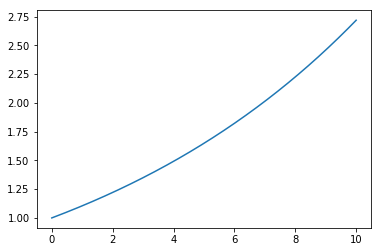

In [5]:
# Caso senza oscillazione del tasso di riproduzione
ts = np.linspace(0, 10, 1000)
Ns = rk2([1], ts, oscilloc(α=0.1, ω=0.0))

plt.plot(ts, Ns)

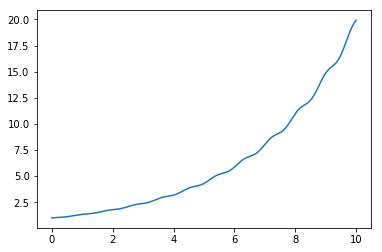

In [6]:
# Caso senza oscillazione del tasso di riproduzione
ts = np.linspace(0, 10, 1000)
Ns = rk2([1], ts, oscilloc(α=0.3, ω=7.0))

plt.plot(ts, Ns)

### Qualche modello bidimensionale

#### Oscillatore armonico

Grazie all'espressività di numpy possiamo definire un modello multidimensionale, cioè con più componenti. Ad esempio possiamo analizzare un modello per l'oscillatore armonico unidimensionale, una massa che si muove su una retta sotto l'effetto della forza di una molla (forza di Hooke), con $x(t)$ la posizione al tempo $t$:

$$ m \ddot x = - k x $$

Poiché questa equazione differenziale **non** è del primo ordine, operiamo come detto nella prima parte per ridurre il sistema ad un sistema di primo ordine: introduciamo la nuova quantità $v(t)$ che è la velocità in funzione del tempo

$$ \dot x = v(t) $$

Quindi otteniamo un sistema di due equazioni differenziali, una per la legge di Newton e l'altra che è semplicemente la definizione di velocità:

$$ \left\{
\begin{array}{rcl}
m \dot v(t) &=& -k \ x \\
\dot x(t) &=& v(t)
\end{array}
\right.$$

Quindi le quantità che definiscono il nostro modello si possono scrivere come un vettore di due componenti (usiamo per lo stato del sistema la lettera $X$ maiuscola per distinguerla dalla posizione $x(t)$):

$$ X(t) = \left[\begin{array}{c} x(t) \\ v(t) \end{array} \right] $$

Pertanto la funzione $f(X, t)$ avrà anch'essa due componenti:

$$ f(X, t) = \left[\begin{array}{c} v(t) \\ -\frac{k}{m} x(t) \end{array} \right] $$

L'implementazione in Python può essere la seguente:

In [7]:
def harmonic(ω):
    def wrap(x, t):
        return np.array([x[1], - ω**2 * x[0]])
    
    return wrap

Proviamo il metodo di Euler:

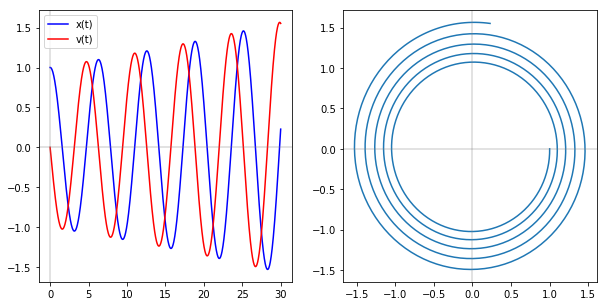

In [8]:
ts = np.linspace(0, 30, 1000)
xs = euler([1, 0], ts, harmonic(1.0))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].plot(ts, xs[:, 0], 'b', label='x(t)')
ax[0].plot(ts, xs[:, 1], 'r', label='v(t)')
ax[0].axhline(0, color='grey', alpha=0.3)
ax[0].axvline(0, color='grey', alpha=0.3)
ax[0].legend()
ax[1].plot(xs[:, 0], xs[:, 1])
ax[1].axhline(0, color='grey', alpha=0.3)
ax[1].axvline(0, color='grey', alpha=0.3)

Vediamo (per esempio nel grafico di sinistra) che le oscillazioni della nostra simulazione **aumentano in ampiezza**: di conseguenza l'energia non èconservata! Chiaramente è un artefatto del metodo di Euler, ed è un fenomeno che accade spesso con questo metodo. Proviamo a confrontare questo risultato con il risultato ottenuto dal metodo di Runge-Kutta: sarà sufficiente usare la funzione `rk2(x0, ts, f)` al posto di `euler(x0, ts, f)`

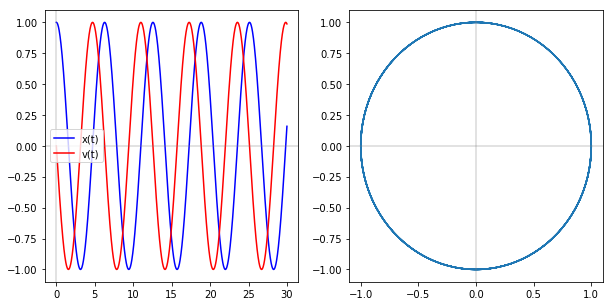

In [9]:
ts = np.linspace(0, 30, 1000)
xs = rk2([1, 0], ts, harmonic(1.0))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].plot(ts, xs[:, 0], 'b', label='x(t)')
ax[0].plot(ts, xs[:, 1], 'r', label='v(t)')
ax[0].axhline(0, color='grey', alpha=0.3)
ax[0].axvline(0, color='grey', alpha=0.3)
ax[0].legend()
ax[1].plot(xs[:, 0], xs[:, 1])
ax[1].axhline(0, color='grey', alpha=0.3)
ax[1].axvline(0, color='grey', alpha=0.3)

Il risultato, che utilizza lo stesso passo temporale e la stessa discretizzazione `ts`, è evidentemente migliore.

#### Oscillatore armonico smorzato, versione 1

Facciamo un altro modello di oscillatore armonico, uno in cui oltre alla forza elastica abbiamo anche un attrito di tipo viscoso, quindi proporzionale alla velocità $F_v = - \beta v$:

$$ m \ddot x = - k \ x - \beta \ v $$

Ovviamente in questo modello le oscillazioni tendono a smorzarsi fino a fermarsi. L'implementazione del modello in Python è:

In [10]:
def damped_oscillator(ω, β):
    def wrap(x, t):
        return np.array([x[1], - ω**2 * x[0] - β * x[1]])
    
    return wrap

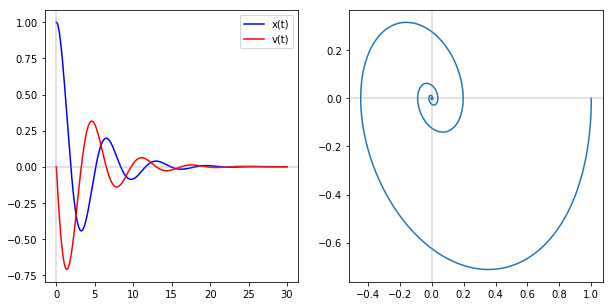

In [11]:
ts = np.linspace(0, 30, 1000)
xs = rk2([1, 0], ts, damped_oscillator(ω=1.0, β=0.5))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].plot(ts, xs[:, 0], 'b', label='x(t)')
ax[0].plot(ts, xs[:, 1], 'r', label='v(t)')
ax[0].axhline(0, color='grey', alpha=0.3)
ax[0].axvline(0, color='grey', alpha=0.3)
ax[0].legend()

ax[1].plot(xs[:, 0], xs[:, 1])
ax[1].axhline(0, color='grey', alpha=0.3)
ax[1].axvline(0, color='grey', alpha=0.3)

### Altri sistemi multidimensionali

Vediamo un altro sistema, non meccanico, ma ultimamente piuttosto famoso: il **modello compartimentale SIR**. Questi modelli vengono usati per descrivere l'andamento in una popolazione per una infezione contagiosa. Dividiamo una popolazione in tre componenti: la prima componente è costituita da tutti gli individui sani che non hanno ancora contratto l'infezione ma che sono *suscettibili* a contrarla; la seconda componente è costituita dagli individui che, avendo contratto l'infezione, sono a loro volta infettivi; la terza componente è costituita dagli individui che sono guariti da questa infezione dopo averla contratta, e non possono più essere reinfettati.

Per descrivere una certa situazione di contagio nella popolazione usiamo tre frazioni comprese tra $0$ e $1$ corrispondenti alle frazioni di popolazione nei tre "compartimenti" summenzionati; quindi le variabili di interesse saranno $S(t)$ la frazione della popolazione suscettibile al tempo $t$, $I(t)$ la frazione di popolazione infetta/infettiva al tempo $t$, e $R(t)$ la frazione di popolazione guarita dall'infezione e non più infettabile. Ovviamente la somma delle frazioni è uguale a $1$:

$$ S(t) + I(t) + R(t) = 1 $$

Il modello (almeno il più semplice) si scrive nel modo seguente (analizzare il quale va al di là dei nostri scopi immediati):

$$
\left\{
\begin{array}{rcl}
\dot S(t) &=& - a \ S(t) \ I(t) \\
\dot I(t) &=& a \ S(t) \ I(t) - b \ I(t) \\
\dot R(t) &=& b \ I(t) \\
\end{array}\right.
$$

I parametri $a$ e $b$ corrispondono rispettivamente alla capacità dell'infezione di propagarsi e alla velocità con la quale un individuo guarisce dall'infezione. Ci sarebbero da precisare le proprietà che l'infezione e la popolazione devono soddisfare perché abbia senso questo modello, ma come detto esulano dai nostri interessi attuali.

L'implementazione in Python è:

In [12]:
def SIR(a=0.1, b=0.1):
    def g(x, t):
        s, i, r = x
        sp = -a*s*i
        ip = a*s*i - b*i
        rp = b*i
        
        return np.array([sp, ip, rp])
    
    return g

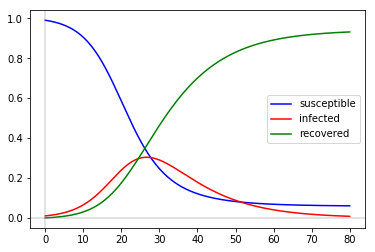

In [13]:
# situazione iniziale: il 99% della popolazione non è mai entrata in contatto con l'infezione,
# e pertanto risulta suscettibile, invece l'1% della popolazione è stata inizialmente infettata. 
# Nessuno invece è ancora guarito all'inizio della simulazione.
sir0 = 0.99, 0.01, 0.0 

# Usiamo un intervallo di tempo suddiviso in N sottointervalli
N = 1000
ts = np.linspace(0, 80, N)

# Usiamo Runge-Kutta, scegliamo per il modello dei valori definiti dei parametri
sirs = rk2(sir0, ts, SIR(a=0.3, b=0.1))

plt.plot(ts, sirs[:, 0], 'b', label='susceptible')
plt.plot(ts, sirs[:, 1], 'r', label='infected')
plt.plot(ts, sirs[:, 2], 'g', label='recovered')

plt.axhline(0, color='grey', alpha=0.3)
plt.axvline(0, color='grey', alpha=0.3)

plt.legend()

Osserviamo che la curva degli infetti raggiunge un massimo ad un certo istante, e poi decresce fino ad annullarsi, mentre una frazione della popolazione non viene mai infettata. Nel lungo periodo l'infezione si estingue lasciando nessun infetto.

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licenza Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Physics Club - Integrazione Numerica</span> di<span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName"> Mauro Riccardi</span> è distribuito con Licenza <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribuzione - Non commerciale - Condividi allo stesso modo 4.0 Internazionale</a>.